### Importing Libraries

In [32]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, \
accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn import svm
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


#### Reading csv

In [33]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [34]:
df=df.drop('Unnamed: 0',axis=1)

In [35]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [36]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Decision Tree Classifier

In [38]:
model_dt=DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=6, min_samples_leaf=8)

In [39]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [40]:
y_pred=model_dt.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [41]:
model_dt.score(x_test,y_test)# copring xtest and y test


0.7967306325515281

In [42]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1034
           1       0.63      0.57      0.60       373

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.79      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [43]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [44]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [45]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [46]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9498725573491928
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       511
           1       0.95      0.96      0.96       666

    accuracy                           0.95      1177
   macro avg       0.95      0.95      0.95      1177
weighted avg       0.95      0.95      0.95      1177



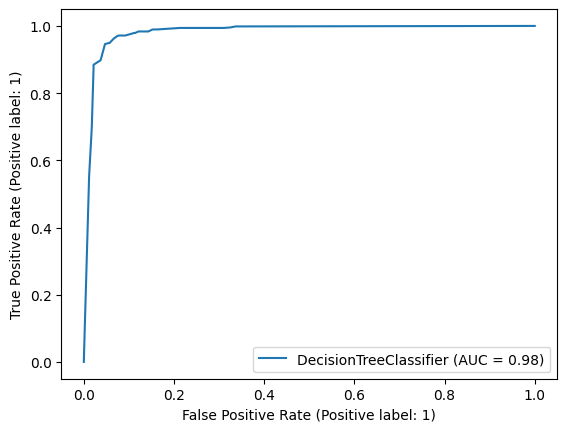

In [47]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(model_dt_smote, xr_test, yr_test)  
plt.show()

In [33]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[471  64]
 [ 28 605]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [36]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [37]:
y_pred=model_rf.predict(x_test)

In [38]:
model_rf.score(x_test,y_test)

0.798862828713575

In [39]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1034
           1       0.70      0.42      0.53       373

    accuracy                           0.80      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.79      0.80      0.78      1407



In [41]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [42]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [43]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [44]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [45]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [46]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [47]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9391602399314481
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       505
           1       0.93      0.97      0.95       662

    accuracy                           0.94      1167
   macro avg       0.94      0.93      0.94      1167
weighted avg       0.94      0.94      0.94      1167



In [48]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[455  50]
 [ 21 641]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

###### We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

#### Performing PCA

In [49]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [50]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [51]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [52]:
yr_predict_pca = model.predict(xr_test_pca)

In [53]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [54]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7343616109682948
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       505
           1       0.77      0.76      0.76       662

    accuracy                           0.73      1167
   macro avg       0.73      0.73      0.73      1167
weighted avg       0.74      0.73      0.73      1167



##### With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

In [65]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [66]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [75]:
from xgboost import XGBClassifier
xgb_clf= XGBClassifier()
xgb_clf.fit(xr_train1, yr_train1)


/Users/nair/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train_data: ', accuracy_score(y_true = y_train, y_pred = xgb_clf.predict(x_train).round()))


Accuracy score on train_data:  0.8007111111111112


In [77]:
print('Accuracy score on test_data: ', accuracy_score(y_true = y_test, y_pred = xgb_clf.predict(x_test).round()))

Accuracy score on test_data:  0.8002842928216063


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()

In [85]:
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 5)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=10)
knn_gscv.fit(x_train,y_train)
knn_gscv.best_score_

0.7637364651744909

In [87]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [90]:
print('Accuracy on training set:',nb_clf.score(x_train,y_train))
print('Accuracy on test set:',nb_clf.score(x_test,y_test))

Accuracy on training set: 0.7036444444444444
Accuracy on test set: 0.7149964463397299


In [ ]:
# here i have used random forest. as the final production model as it was giving better results

#### Pickling the model

In [37]:
import pickle

In [38]:
filename = 'model.sav'

In [39]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [40]:
load_model = pickle.load(open(filename, 'rb'))

In [41]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [42]:
model_score_r1

0.9427350427350427

##### Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.